<a href="https://colab.research.google.com/github/Vonewman/Language-detector/blob/main/Building_the_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings("ignore")

In [18]:
# Loading the dataset
data = pd.read_csv("language_detection.csv")

In [19]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [20]:
data.shape

(10337, 2)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [22]:
X = data["Text"]
y = data["Language"]

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

### Text Processing

In [25]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

### Bag of words

In [26]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [27]:
X.shape

(10337, 39404)

### Train Test split

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Model creation and prediction

In [29]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [30]:
# prediction 
y_pred = model.predict(x_test)

### Evaluating the model

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [33]:
print("Accuracy is :", ac)

Accuracy is : 0.9792069632495164


In [34]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       113
           1       0.99      0.95      0.97        78
           2       1.00      0.98      0.99       110
           3       0.91      1.00      0.95       283
           4       0.98      0.99      0.99       207
           5       0.99      1.00      1.00       112
           6       1.00      0.97      0.99        75
           7       1.00      1.00      1.00        15
           8       0.98      0.99      0.98       135
           9       1.00      0.92      0.96        84
          10       0.98      1.00      0.99       116
          11       1.00      0.98      0.99       121
          12       1.00      0.98      0.99       139
          13       0.98      0.98      0.98       163
          14       0.99      0.97      0.98       134
          15       1.00      1.00      1.00        94
          16       1.00      0.92      0.96        89

    accuracy              

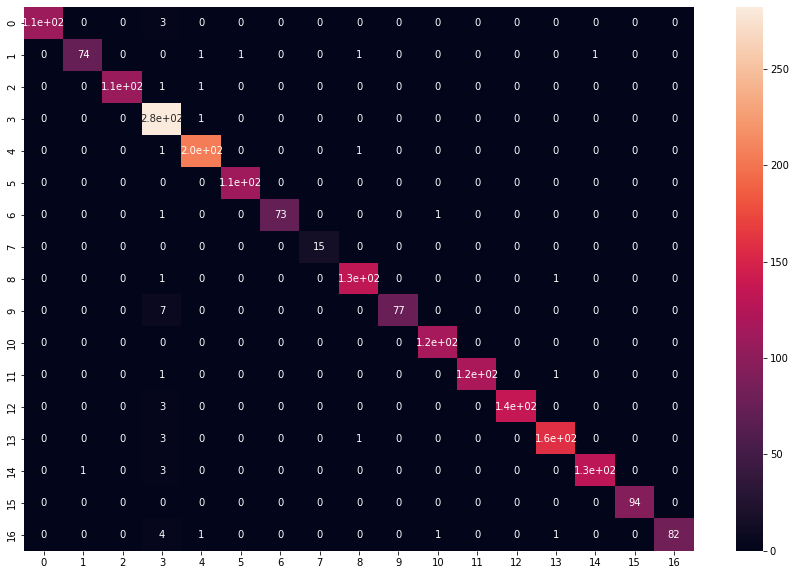

In [35]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Model Saving

In [36]:
# saving both cv and model
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))